Import necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from xgboost import plot_tree

Generate a synthetic dataset using sklearn's make_classification.
This dataset has 1000 samples, 2 informative features, and no redundant features

In [ ]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

Split the dataset into training and testing sets (80% train, 20% test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Initialize the XGBoost Classifier
'n_estimators' is the number of trees in the forest (set to 100. 'learning_rate' controls how much each tree contributes (set to 0.1).
'use_label_encoder=False' avoids deprecated warnings in XGBoost.

In [ ]:
model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42, use_label_encoder=False)

Fit the model on the training data

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:20:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Predict on the test data

In [ ]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probability predictions for ROC AUC

Essential Metrics Calculation

Accuracy

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.925


Precision

In [ ]:
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.9090909090909091


Recall

In [ ]:
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.9375


F1 Score

In [ ]:
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.9230769230769231


ROC-AUC Score (Area under the ROC curve)

In [ ]:
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.9822716346153847


Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[95  9]
 [ 6 90]]


Visualizing Feature Importance

XGBoost provides built-in feature importance information
Plot the feature importance

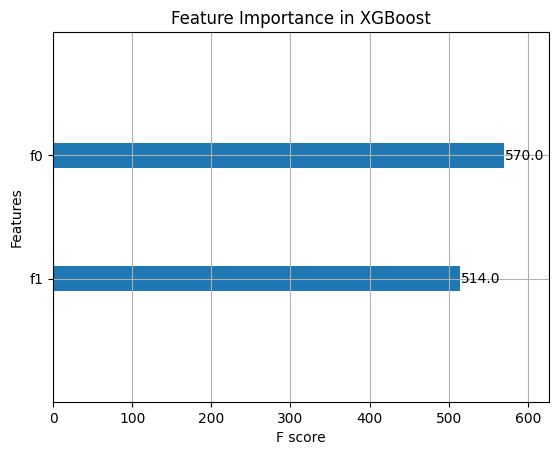

In [ ]:
xgb.plot_importance(model)
plt.title('Feature Importance in XGBoost')
plt.show()

Visualize one of the Decision Trees in XGBoost model

<Figure size 1200x800 with 0 Axes>

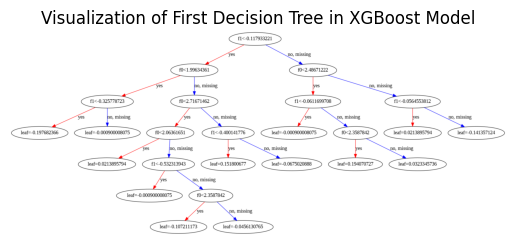

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(model, num_trees=0)  # Visualizing the first tree
plt.title("Visualization of First Decision Tree in XGBoost Model")
plt.show()

Prediction with a test example

In [ ]:
test_example = np.array([[0.7, 0.4]])  # Test example with two feature values
prediction = model.predict(test_example)
print(f"\nPrediction for test example {test_example}: Class {prediction[0]}")


Prediction for test example [[0.7 0.4]]: Class 1


Concept of Boosting

In XGBoost, boosting works by training decision trees sequentially.
Each tree tries to correct the residual errors made by the previous trees.
The contribution of each tree is controlled by the 'learning_rate' parameter.